In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from scipy.stats import gmean, variation

In [21]:
def read_df(fname, countries, years):
    """
    Function to read the csv file and return 2 dataframes,one with years 
    as columns and the other with countries as columns. Takes the filename as
    the argument.
    """
    # read file into a dataframe
    df0 = pd.read_csv(fname, on_bad_lines='skip', skiprows=4, index_col=0)
    # some cleaning
    df0.drop(columns=["Country Code"], axis=1, inplace=True)
    df1 = df0.loc[countries,years]
    # dataframe methods for the points
    df1 = df1.sort_index().rename_axis("Years", axis=1).fillna(0)
    # transpose
    df2 = df1.T
    
    return df1, df2

In [30]:
def stats_df(df):
    """
    Function to do some basic statistics on the dataframes.
    Takes the dataframe with countries as columns as the argument.
    """
    # exploring the dataset
    print(df.describe())
    # some basic stats with scipy
    print("Weighted geometric mean is ", gmean(df, axis=0), "\n Coefficient of variation is ", variation(df, axis=0))
    print("Maximum values for each country in these years are ", df.agg(max(axis=0)))
    
    return 
    

In [31]:
# doing the basic sattistics with the function
stats_df(df_co2emissions_2)
stats_df(df_n20emissions_2)

Country Name     Brazil     Canada        China        India        Japan  \
count              6.00       6.00         6.00         6.00         6.00   
mean         327,968.33 504,416.68 5,461,526.57 1,198,961.66 1,165,481.64   
std          104,222.27  57,419.87 3,145,935.85   603,445.89    41,130.21   
min          197,900.00 419,490.00 2,173,360.00   563,580.00 1,090,530.00   
25%          259,377.50 464,592.50 3,153,097.50   787,860.00 1,160,112.49   
50%          322,680.00 525,615.00 4,585,579.94 1,037,164.99 1,175,224.97   
75%          381,370.00 546,025.02 7,812,347.41 1,529,102.48 1,181,817.49   
max          485,340.00 558,700.01 9,861,099.61 2,158,020.02 1,212,819.95   

Country Name  Russian Federation  United Kingdom  United States  
count                       6.00            6.00           6.00  
mean                1,697,540.00      507,318.33   5,312,280.01  
std                   229,593.07       58,198.15     394,011.35  
min                 1,563,850.00      401,

TypeError: max expected at least 1 argument, got 0

In [24]:
def plot_df(df, knd, title, color):
    """
    Function to plot the dataframes using the dataframe.plot method. Arguments:
    The dataframe to be plotted.
    The kind of plot required.
    The title of the figure.
    The color scheme for the plot.
    """
    if knd=="line":
        ax = df.plot(kind=knd, figsize=(9, 5), rot=20, color=color)
        ax.legend(loc='best', fontsize=10)
        ax.set_title(title, fontweight='bold', fontsize='x-large', fontname="Times New Roman")
        ax.set_xlabel("Years", fontweight='bold')
        ax.grid(axis='x', alpha=.85, linewidth=.75)
    else:
        ax = df.plot(kind=knd, figsize=(10, 5), rot=20, color=color)
        ax.legend(loc='best', fontsize=10)
        ax.set_title(title, fontweight='bold', fontsize='x-large', fontname="Times New Roman")
    
    return 

In [25]:
def makeheatmap(filename, country, indicators, c):
    """
    Function to plot the heatmap of a country's climate change indicators. Parameters:
    The name of the csv file containing data of all indicators of all countries as a string(should end in .csv).
    The country of which we're plotting the heatmap of.
    The list of indicators we're consodering for the heat map.
    The color scheme.
    """
    # making the dataframe with which the correlation matrix is to be calculated
    df0 = pd.read_csv(filename, skiprows=4)
    df0.drop(columns=["Country Code", "Indicator Code"], inplace=True)
    # setting multi-index to easily select the country
    df0.set_index(["Country Name", "Indicator Name"], inplace=True)
    df1 = df0.loc[country].fillna(0).T
    # slicing the dataframe to have only the years in which the data is available
    df = df1.loc["1970":"2015",indicators]
    # plotting the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.corr(), cmap=c, annot=True);
    plt.title(country,  fontweight='bold', fontsize='x-large', fontname="Times New Roman")

    return 

In [26]:
# choosing the countries and years for the dataframes
cntrs = ["Japan", "Russian Federation", "China", "United Kingdom", "Brazil",
                    "India", "United States", "Canada"]
yrs = ["1990", "1995", "2000", "2005", "2010", "2015"]

# creating the dataframes with the function
df_co2emissions_1, df_co2emissions_2 = read_df("API_EN.ATM.CO2E.KT_DS2_en_csv_v2_5347102.csv", cntrs, yrs)
df_n20emissions_1, df_n20emissions_2 = read_df("API_EN.ATM.NOXE.KT.CE_DS2_en_csv_v2_4902772.csv", cntrs, yrs)
df_arableland_1, df_arableland_2 = read_df("API_AG.LND.ARBL.ZS_DS2_en_csv_v2_5346580.csv", cntrs, yrs)
df_agricultularland_1, df_agriculturalland_2 = read_df("API_AG.LND.FRST.ZS_DS2_en_csv_v2_5348845.csv", cntrs, yrs)

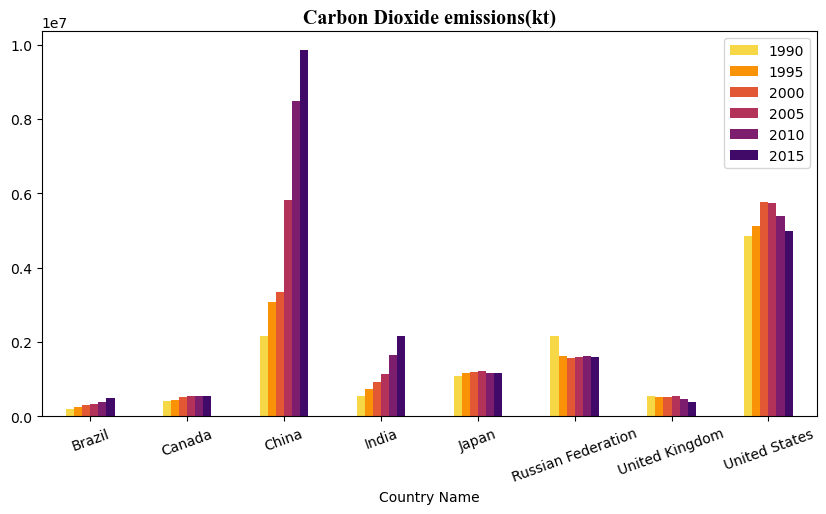

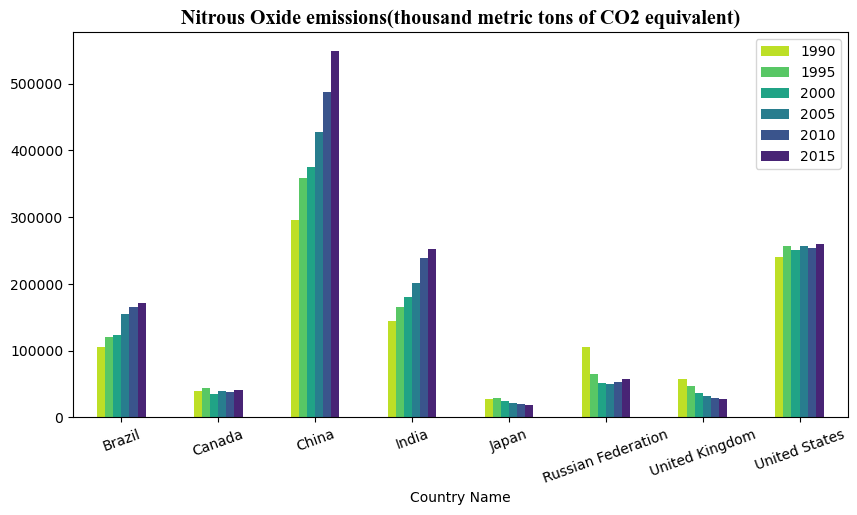

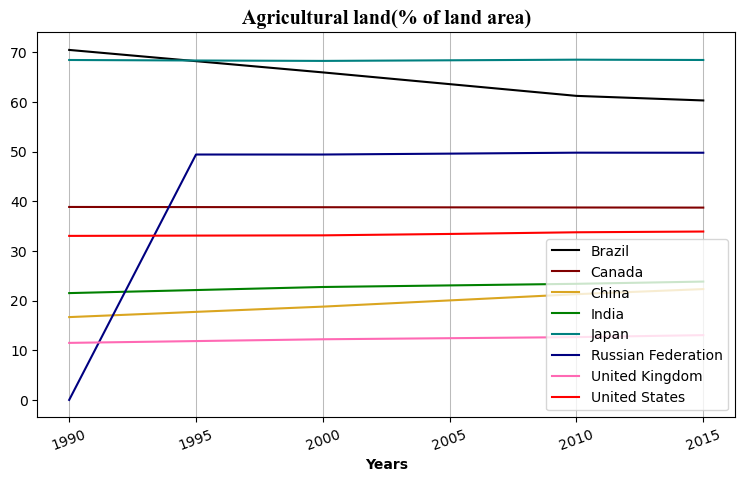

In [27]:
# creating some cool colormaps for the bar plots
c1 = cm.viridis(np.linspace(.1, .9, 6)[::-1])
c2 = cm.inferno(np.linspace(.2, .9, 6)[::-1])
# some distinctive colors for the line plots
c3 = ['black', 'maroon', 'goldenrod', 'green', 'teal', 'navy', 'hotpink', 'red']
c4 = ['b', 'g', 'r', 'k', 'm', 'y', 'c', 'brown']

# plotting dataframes with the function and saving the figures
plot_df(df_co2emissions_1, 'bar', 'Carbon Dioxide emissions(kt)', c2)
plt.savefig("figure1.png")
plot_df(df_n20emissions_1, 'bar', 'Nitrous Oxide emissions(thousand metric tons of CO2 equivalent)', c1) 
plt.savefig("figure2.png")
plot_df(df_agriculturalland_2, 'line', 'Agricultural land(% of land area)', c3) 
plt.savefig("figure3.png")



In [28]:
# supressing scientific notation to use the statistical tools
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

Coefficient of variation was calculated instead of standard deviation because we would be looking at different datasets of similar type(Carbon diooxide and Nitrous oxide emissions). This would help us in finding out which countries had the most relative increase in emissions in that 25 year time period.


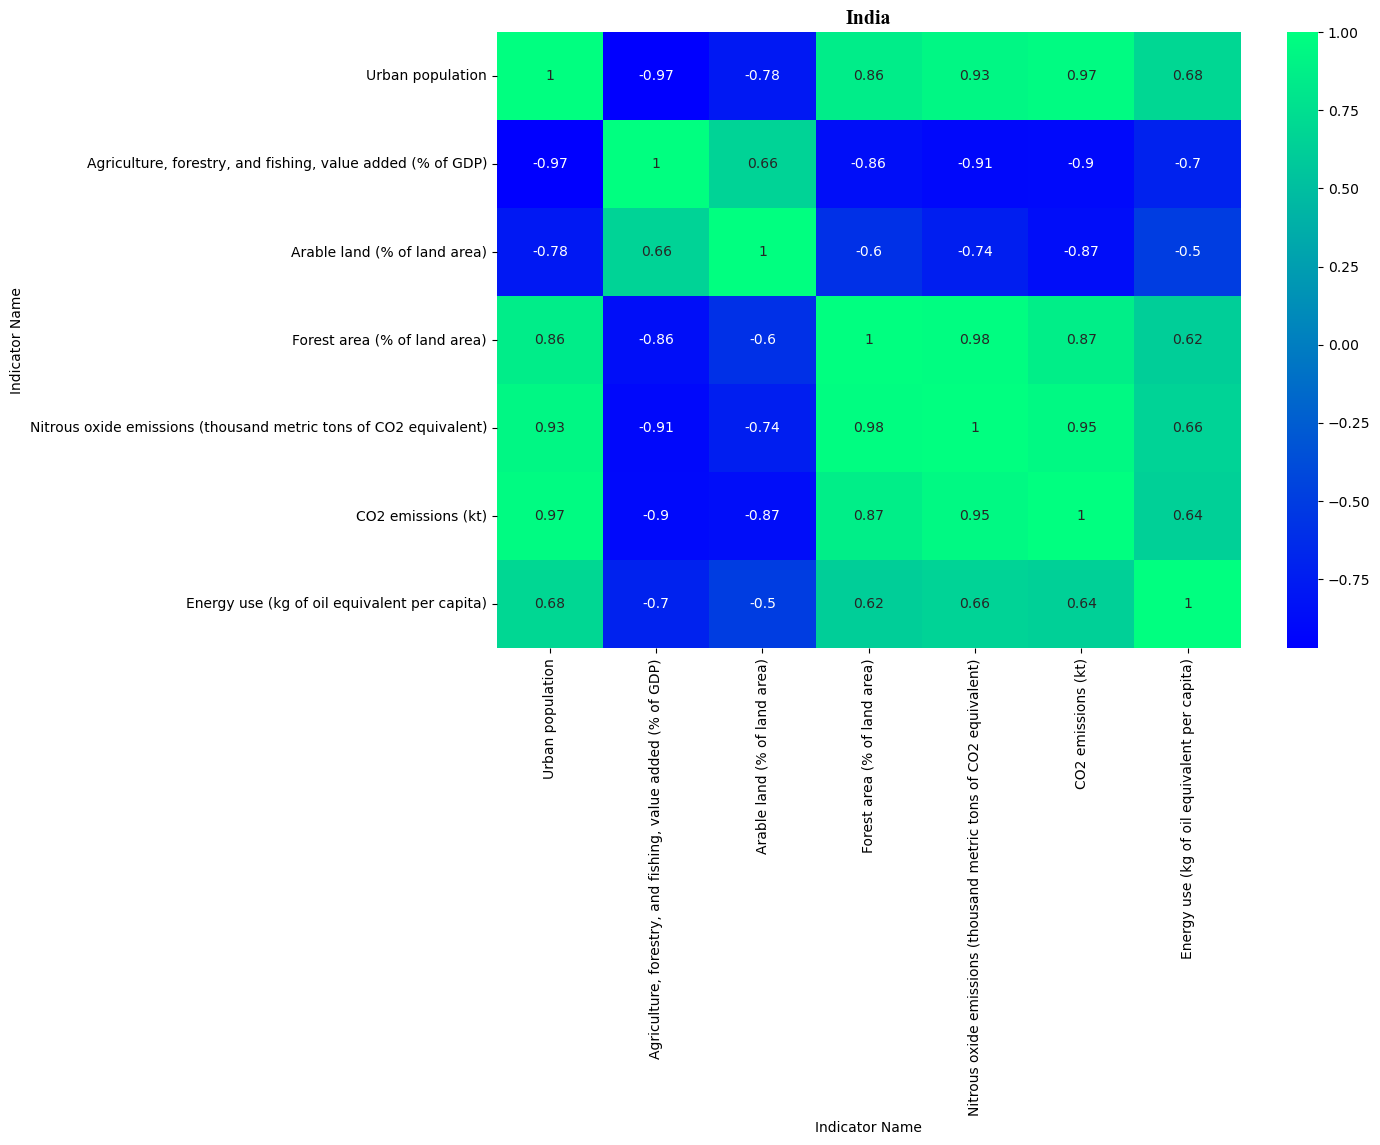

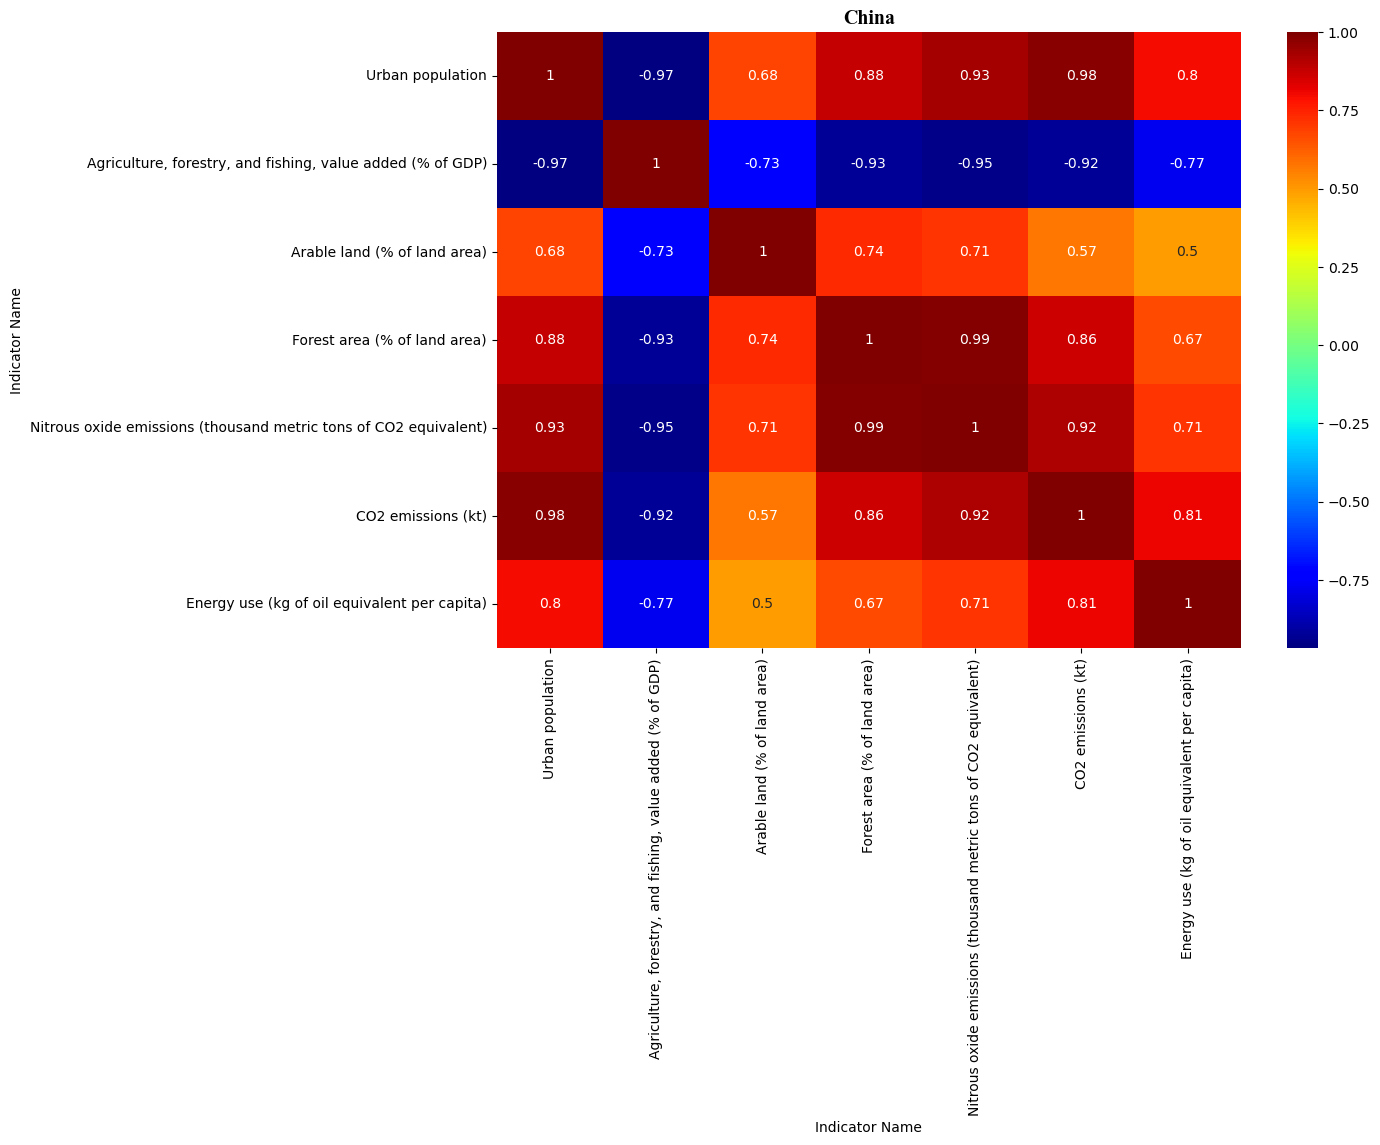

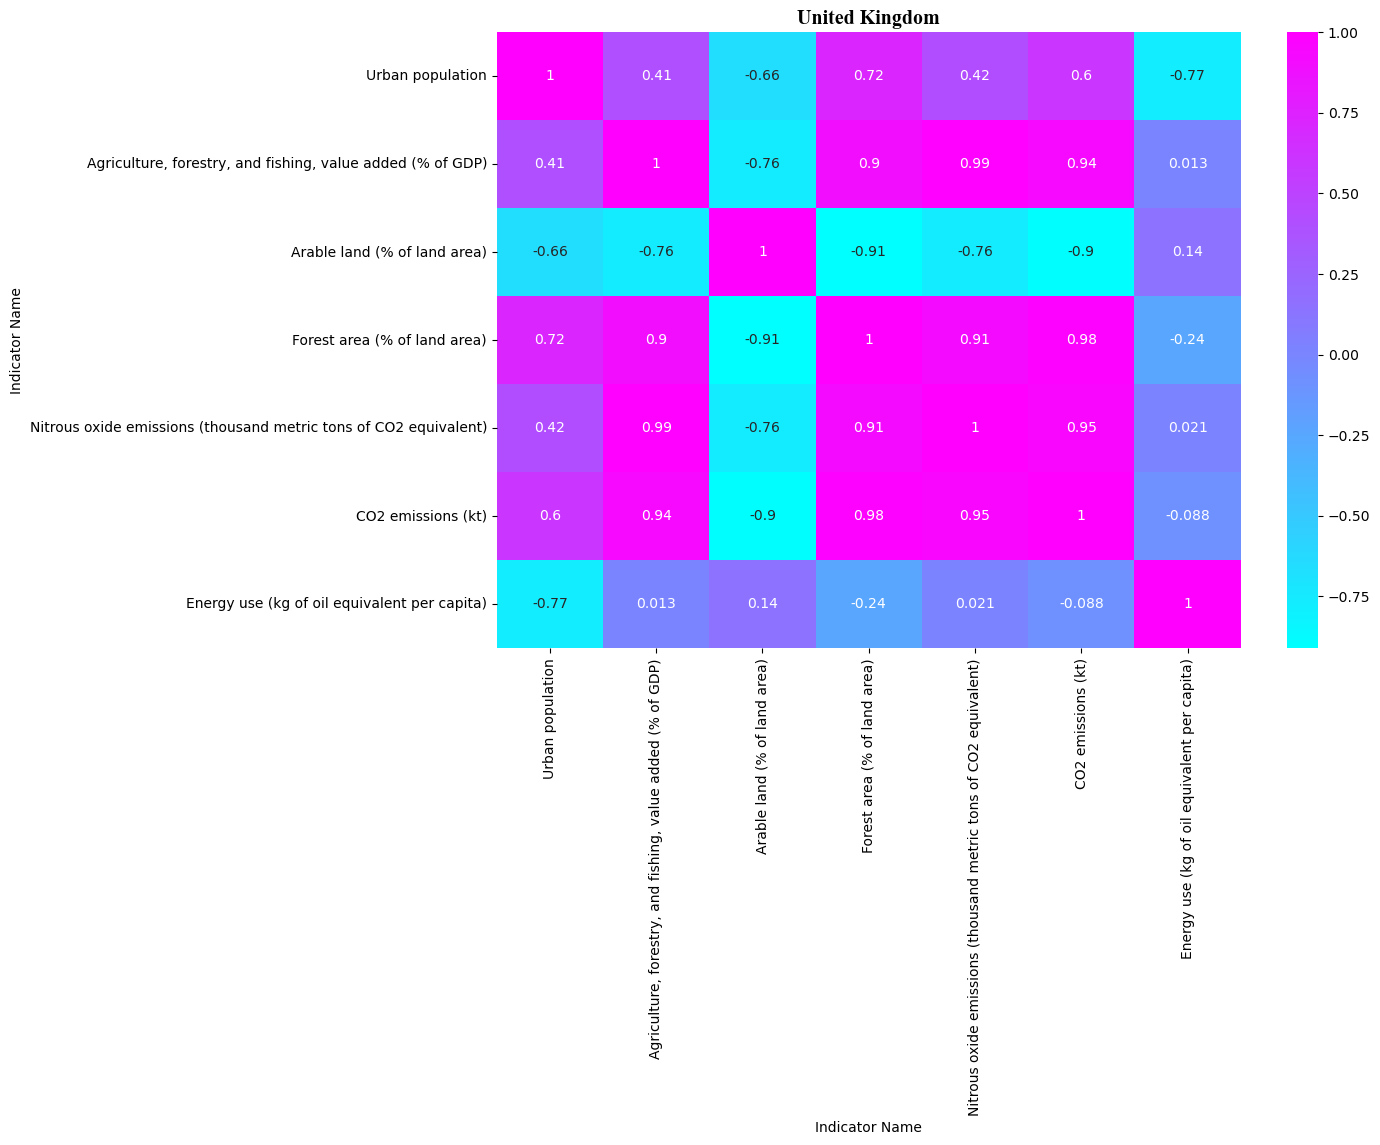

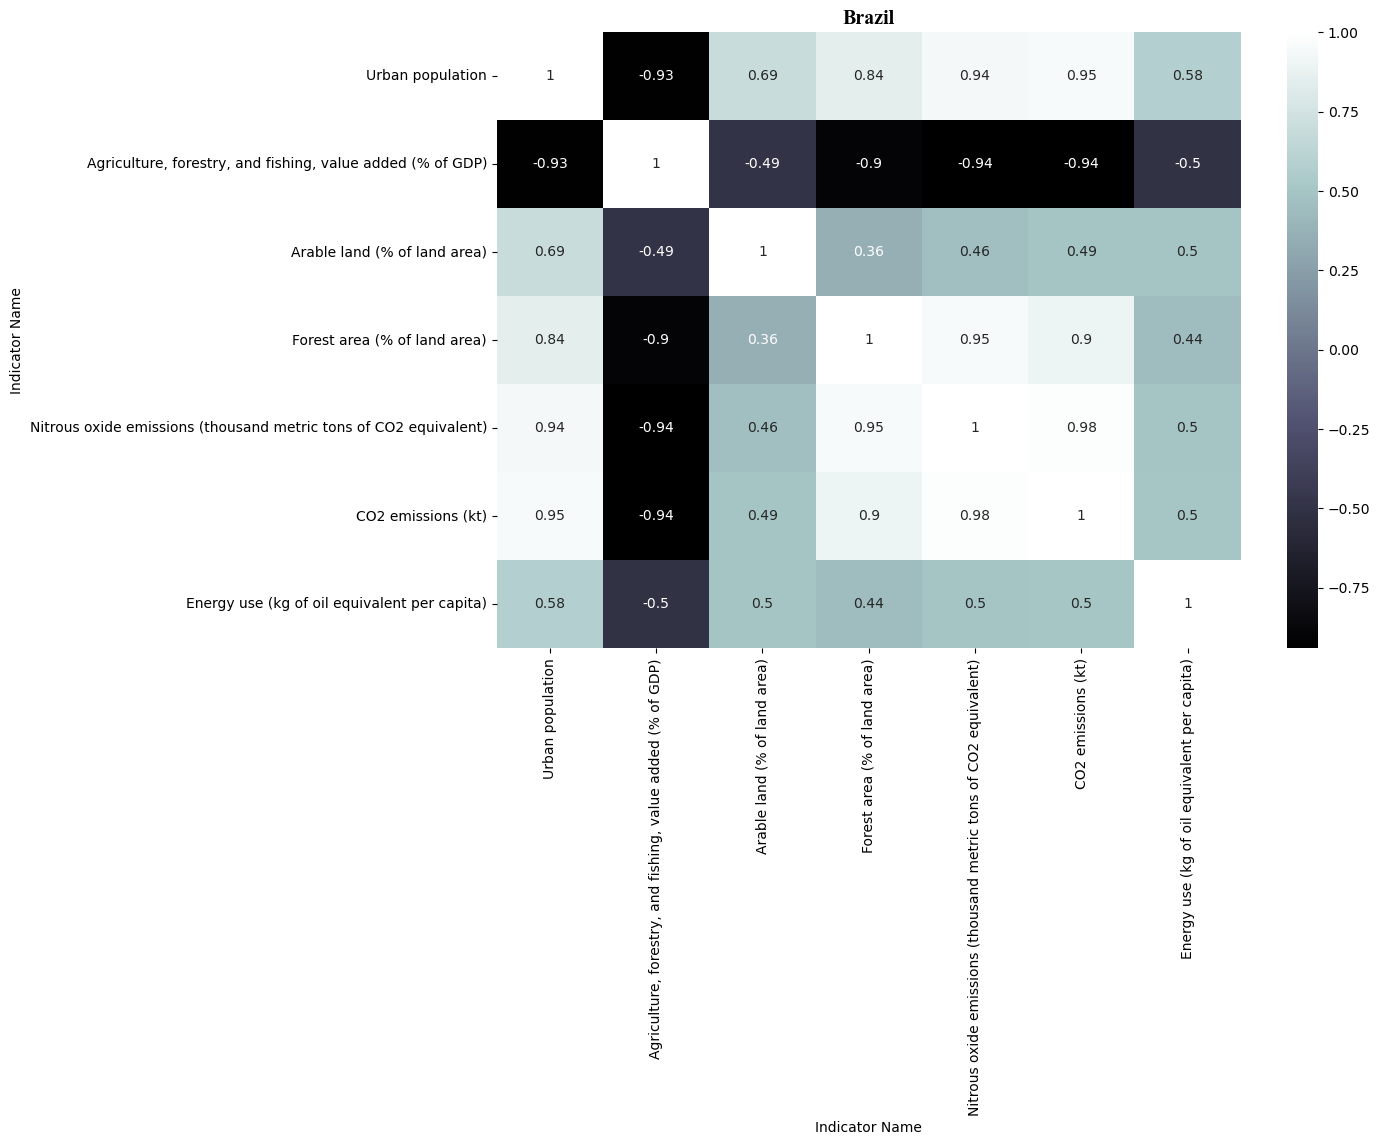

In [29]:
indicators = ["Urban population", "Agriculture, forestry, and fishing, value added (% of GDP)",
              "Arable land (% of land area)", "Forest area (% of land area)",
             "Nitrous oxide emissions (thousand metric tons of CO2 equivalent)", 
             "CO2 emissions (kt)", "Energy use (kg of oil equivalent per capita)"]
c5 = cm.winter
c6 = cm.jet
c7 = cm.cool
c8 = cm.bone
fig5 = makeheatmap("API_19_DS2_en_csv_v2_5346672.csv", "India", indicators, c5)
plt.savefig("figure5.png")
fig6 = makeheatmap("API_19_DS2_en_csv_v2_5346672.csv", "China", indicators, c6)
plt.savefig("figure6.png")
fig7 = makeheatmap("API_19_DS2_en_csv_v2_5346672.csv", "United Kingdom", indicators, c7)
plt.savefig("figure7.png")
fig8 = makeheatmap("API_19_DS2_en_csv_v2_5346672.csv", "Brazil", indicators, c8)
plt.savefig("figure8.png")
